**Trabajo Grupal 3**

In [1]:
## Librerías necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted): 
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)

In [3]:
# Cargar el dataset a partir del código brindado en la guía del trabajo
#URL DEL DATASET
data_url = "http://lib.stat.cmu.edu/datasets/boston"
#LEER EL ARCHIVO DE DATOS
raw_df = pd.read_csv(data_url, sep="\s+", skiprows= 22, header= None)
#COMBINAR LOS DATOS
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2,2]
df = pd.DataFrame(data, columns=[
    "CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
df["PRICE"] = target
#MOSTRAR LAS PRIMERAS FILAS DEL DATAFRAME
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Parte 1: Revisión y análisis exploratorio de datos

In [4]:
# Utilize df.describe() y añada comentarios.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Comentarios a partir de df.describe: todas tienen las 506 observaciones. Algunas variables tienen valores mínimos en cero, aunque la revisión de su construcción permite la existencia de ceros. 

In [5]:
# Utilice df.info() y añada comentarios.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Comentarios a partir de df.info(): Todas las variables tienen valores numéricos (float), necesarios para su uso en modelos de machine learning. 

In [6]:
# Identifique valores faltantes utilizando df.isnull().sum(). 
# Comente sobrecualquier valor faltante y el tratamiento que se aplicará. 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Comentarios a partir de df.isnull().sum(): No existe ningún valor no observado para ninguna de las variables.

In [7]:
## Visualice la distribución de las variables continuas mediante histogramas y los recuentos de frecuencias para las variables discretas. 
# Comente sobre las distribuciones observadas.
# Para definir el color para el plot.
sns.set(style="whitegrid")

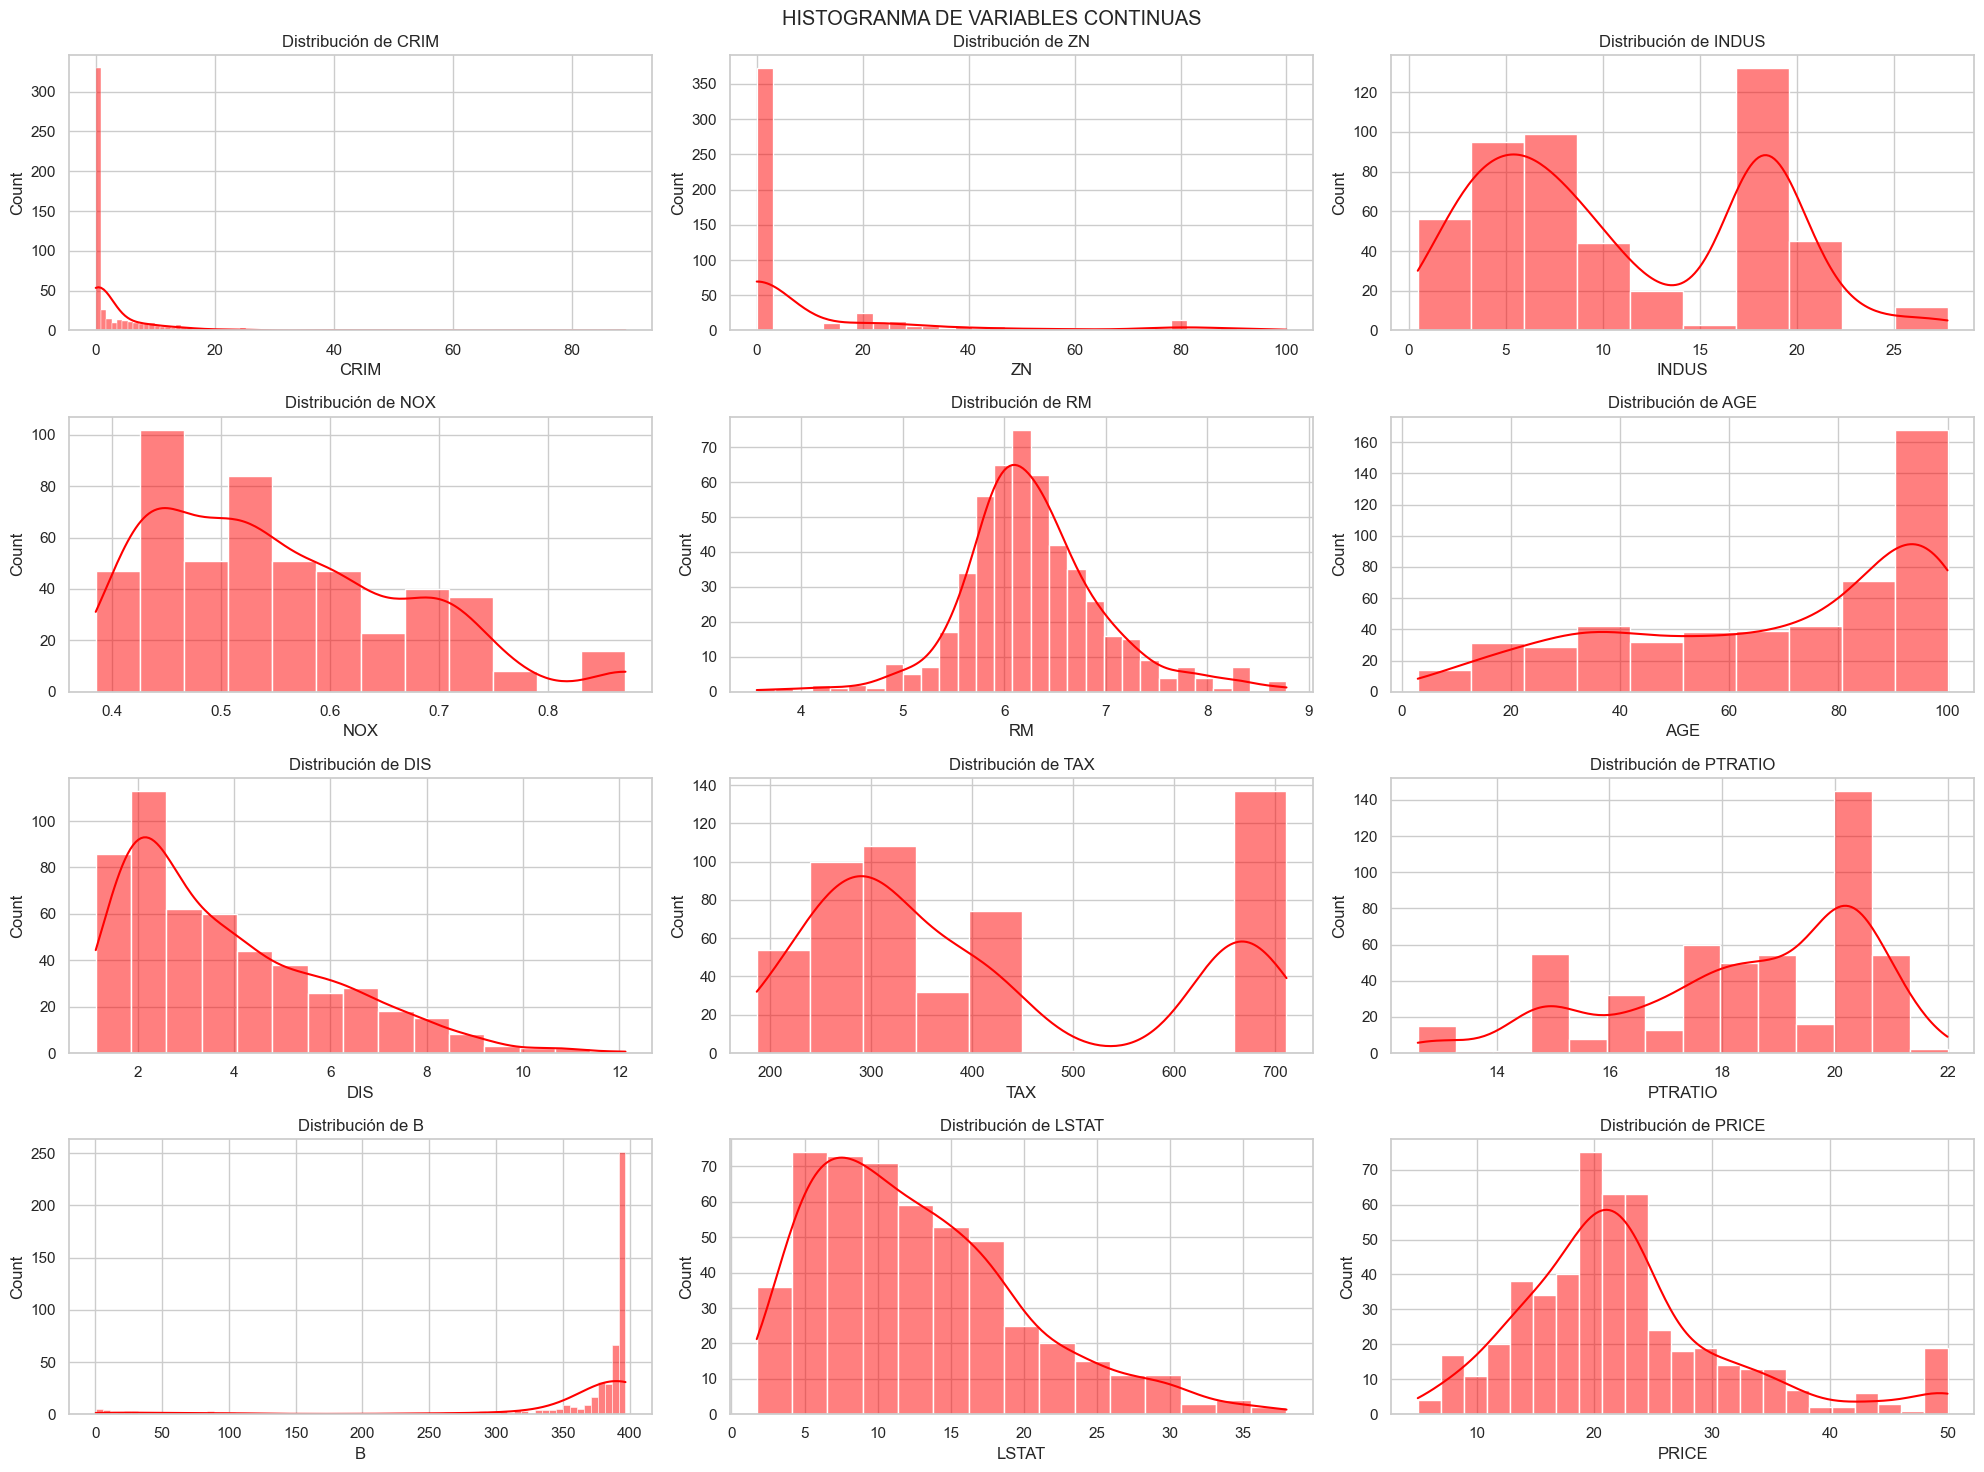

In [8]:
# Para las variables continuas
continuous_vars = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
# Crear histogramas para las variables continuas
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[var], kde=True, color= "red")
    plt.title(f'Distribución de {var}')
    plt.suptitle('HISTOGRANMA DE VARIABLES CONTINUAS')
plt.tight_layout()
plt.show()

Comentarios para la distribución de variables continuas: Algunas variables concentran valores en cero. CRIM concentra muchas observaciones en 0, indicando que una gran parte de los vecindarios son muy seguros. ZN también concentra valores en cero, indicando que los vecindarios no tienen terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados. Por otro lado, TAX posee observaciones cercanas a 700, por encima de las demás observaciones. Existe, entonces, un grupo de vecindarios con una tasa de impuesto a la propiedad de valor total por $10,000 significativamente mayor.

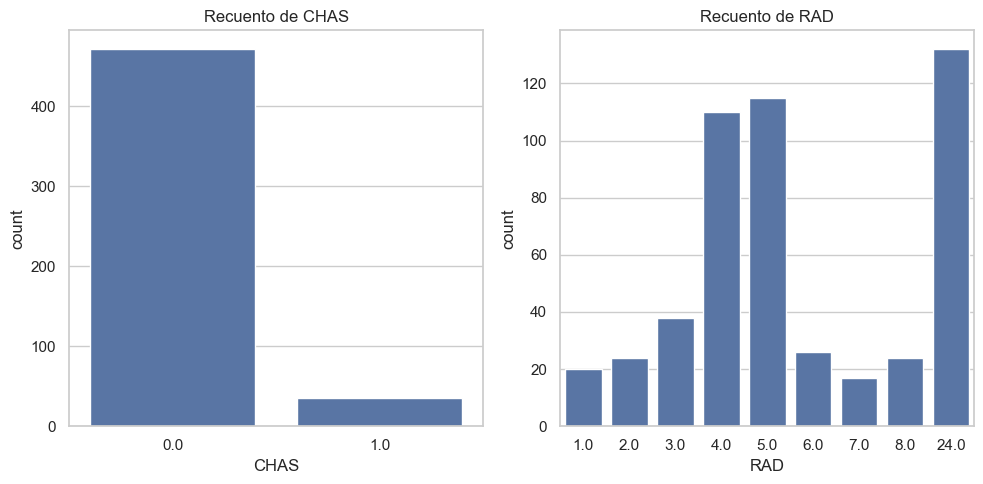

In [9]:
# Para las variables discretas
discrete_vars = ["CHAS", "RAD"]

# Crear gráficos de barras para las variables discretas
plt.figure(figsize=(10, 5))
for i, var in enumerate(discrete_vars):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=df[var])
    plt.title(f'Recuento de {var}')
plt.tight_layout()
plt.show()



Comentarios para la distribución de variables discretas: CHAS es una variable dummy. Concentra valores para el no respecto a si el tramo delimita con el río. RAD es el índice de accesibilidad. Algunos vecindarios tienen índices fuera del promedio, muy por encima del otro máximo (24.0 a 8.0).

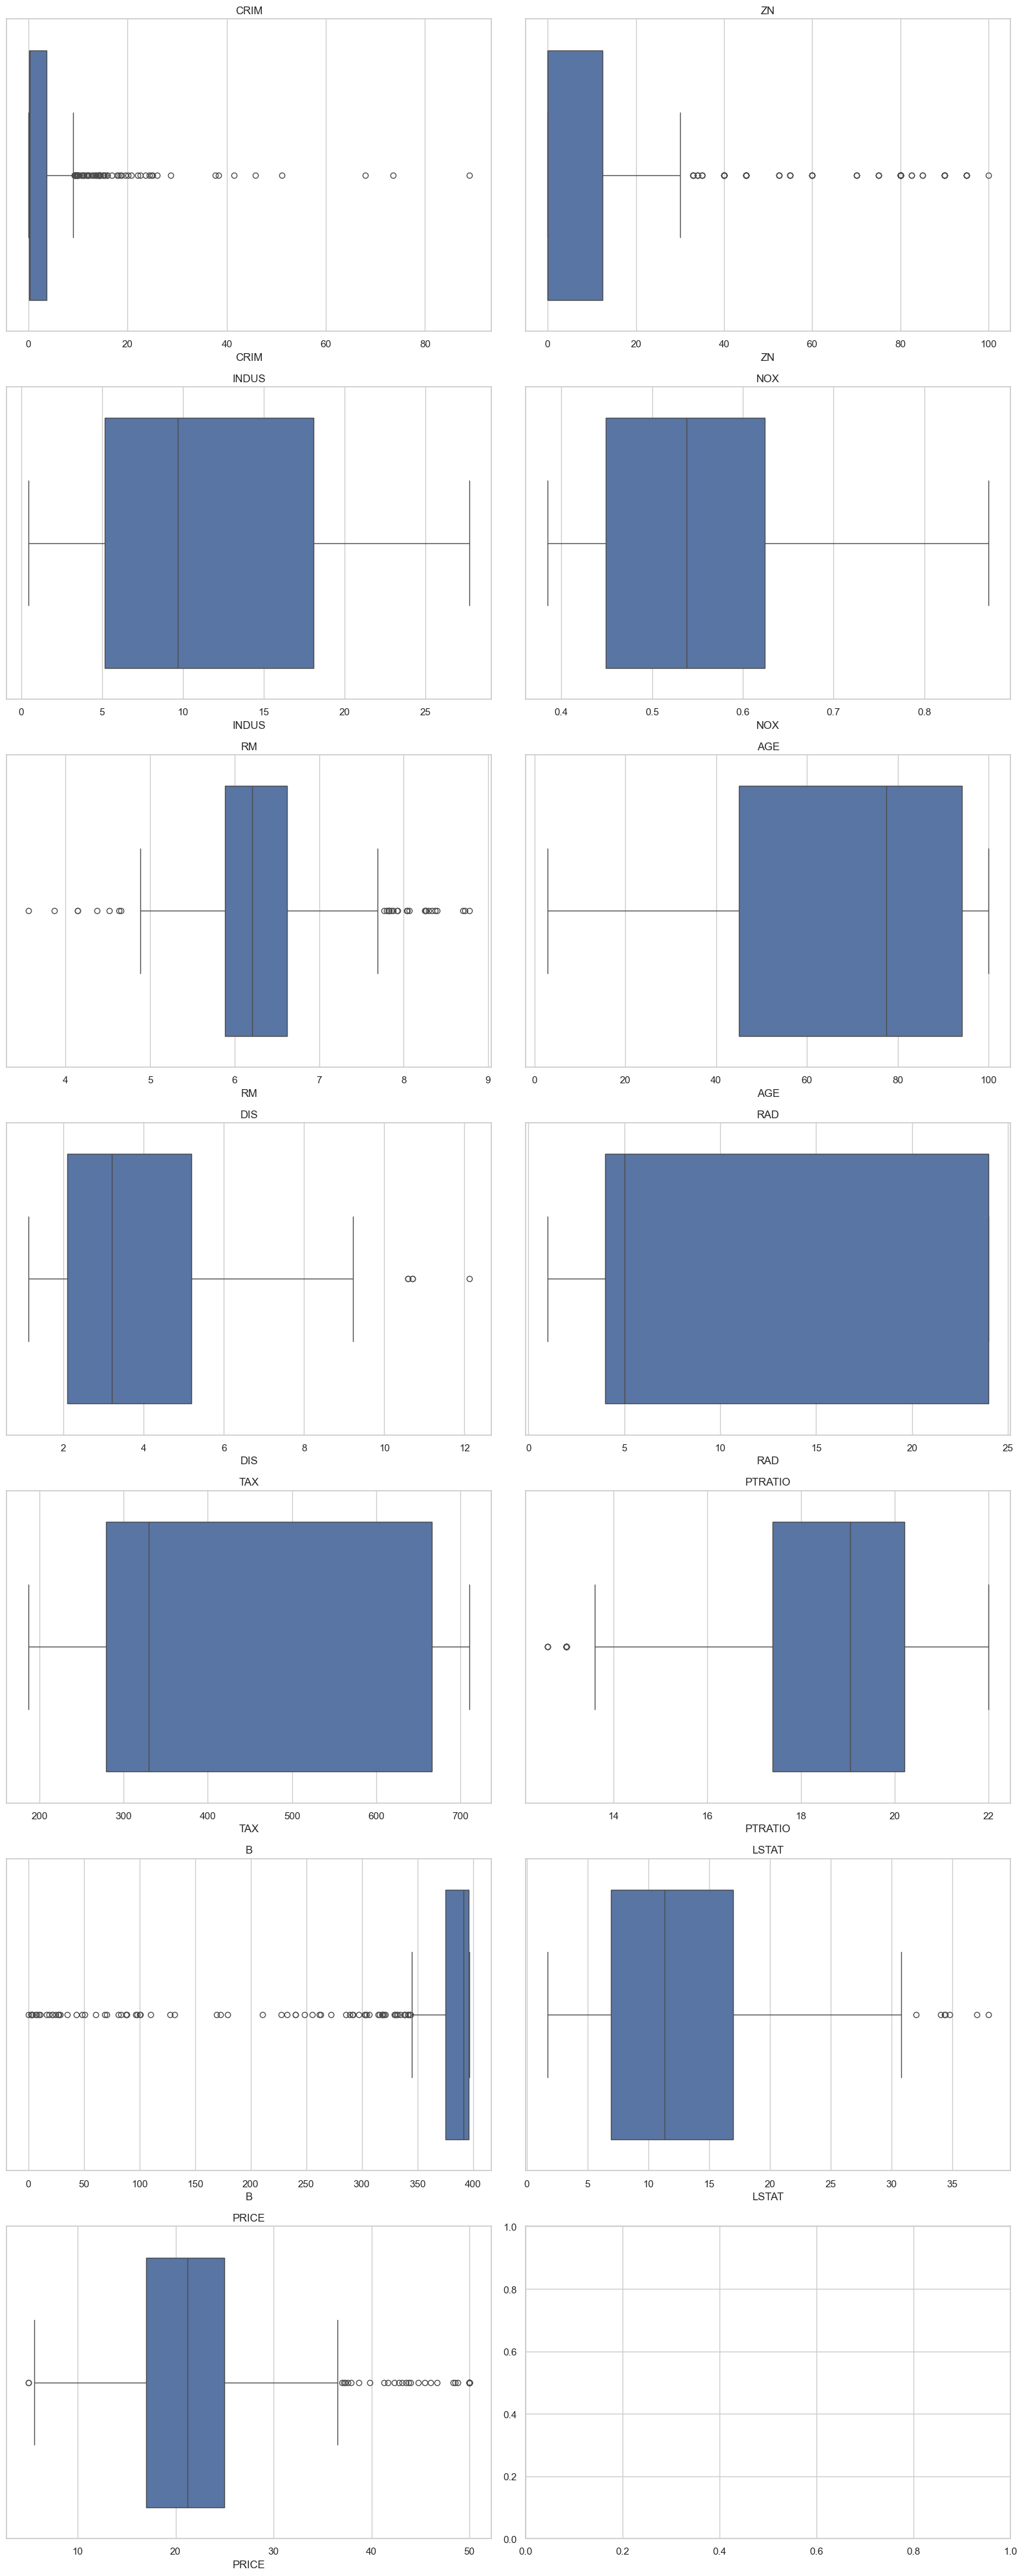

In [10]:
## Utilice boxplots para detectar la presencia de outliers en las variables

# Para las variables numéricas
numeric_vars = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 40))
axes = axes.flatten()
for i, col in enumerate(numeric_vars):
    sns.boxplot(data=df, x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()

Comentarios sobre los boxplots de variables numéricas: Presencia de outliers en RM en el sentido superior de la distribución de las observaciones. B también, aunque puede ser formado por la forma de construir el índice. Las demás variables también tienen outliers pero no son muchas observaciones.

In [11]:
## Analice la relación entre las variables mediante una matriz de correlaciones y gráficos de dispersión. Comente sobre las relaciones observadas. 


<Axes: >

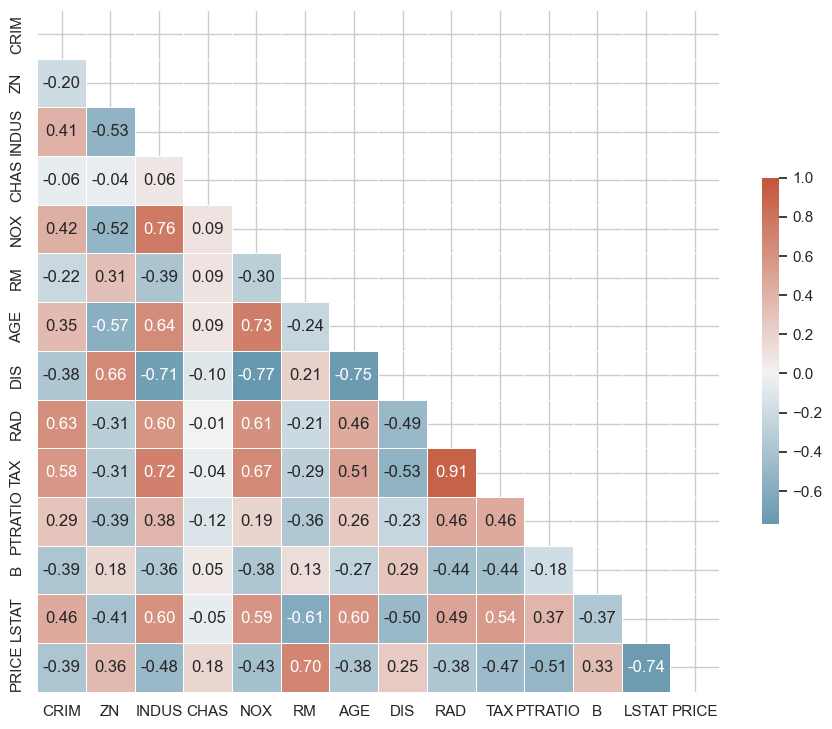

In [12]:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

Comentarios sobre matriz de correlaciones: Asociación fuerte entre RAD y TAX, aunque con cierto sentido. Un mayor número de habitaciones implica aumenta el autovalúo, por lo que la tasa de impuestos sería mayor. Habría que analizarla para evitar problemas de multicolinealidad.

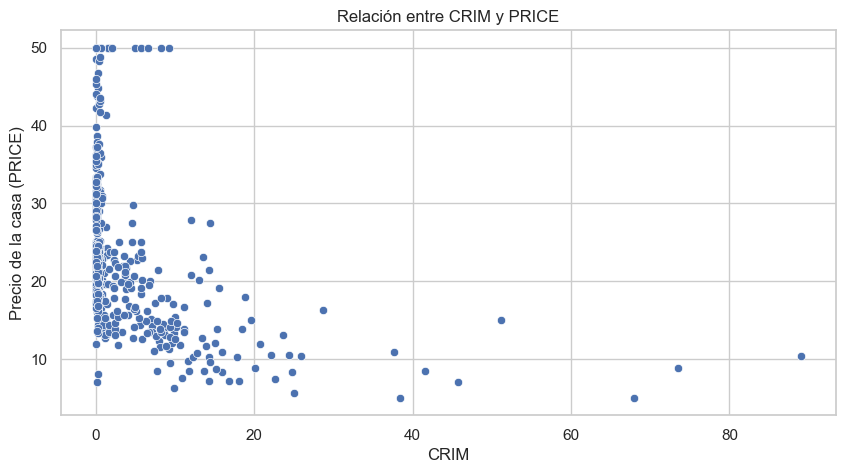

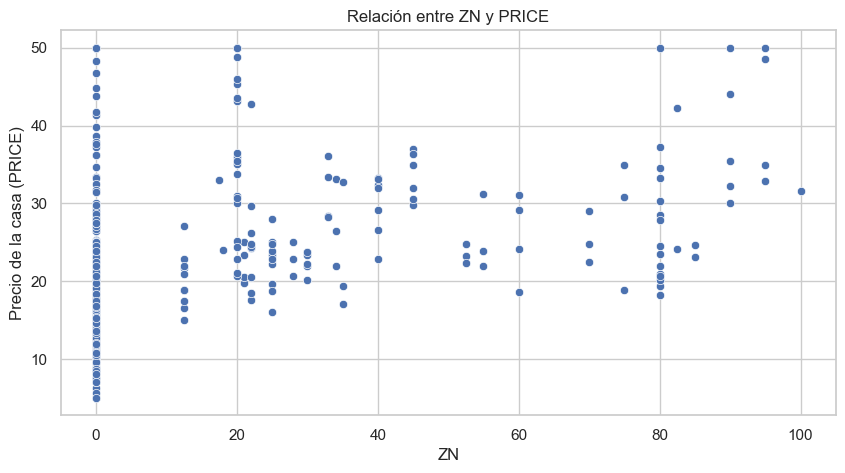

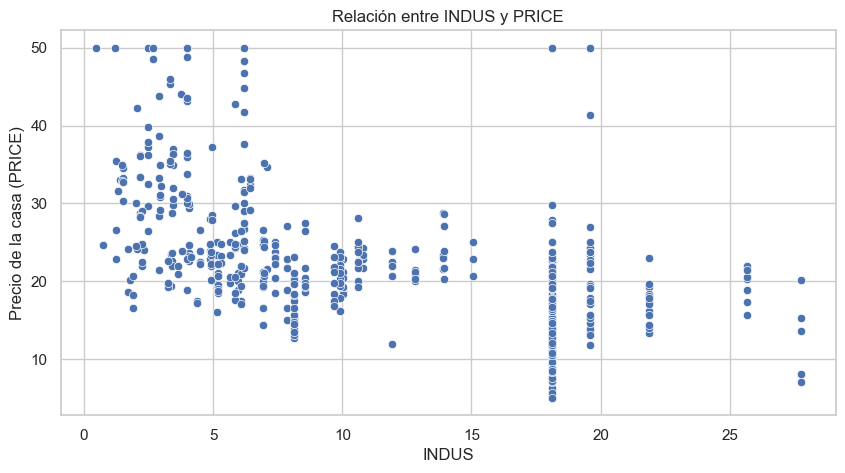

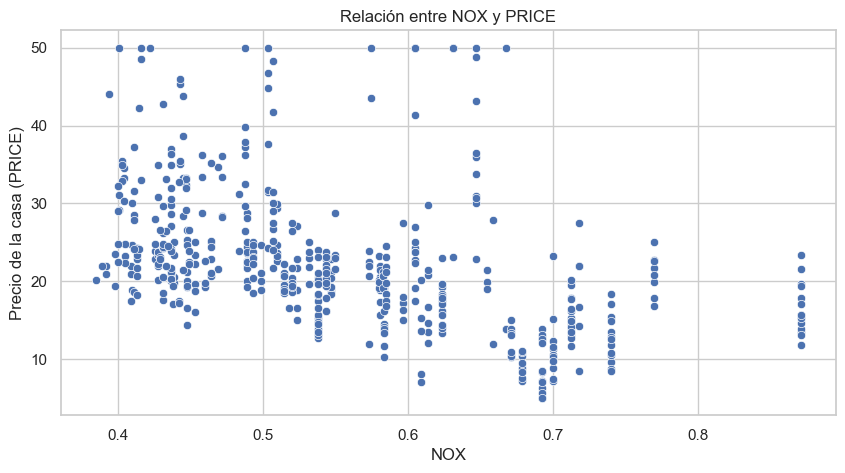

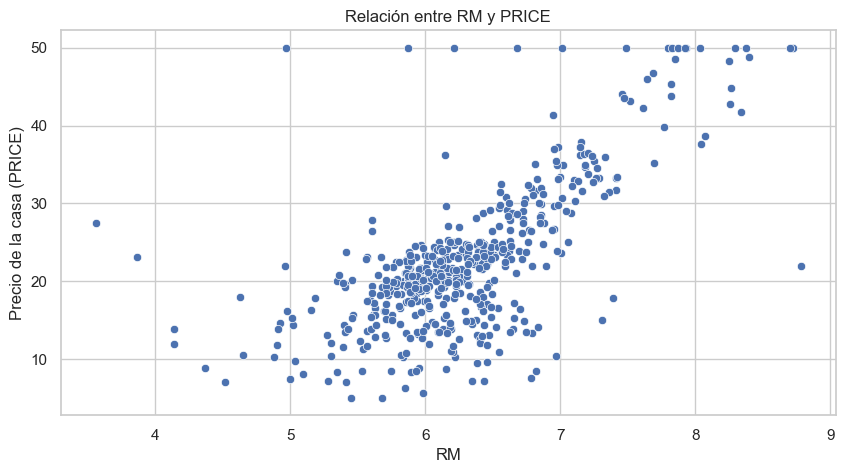

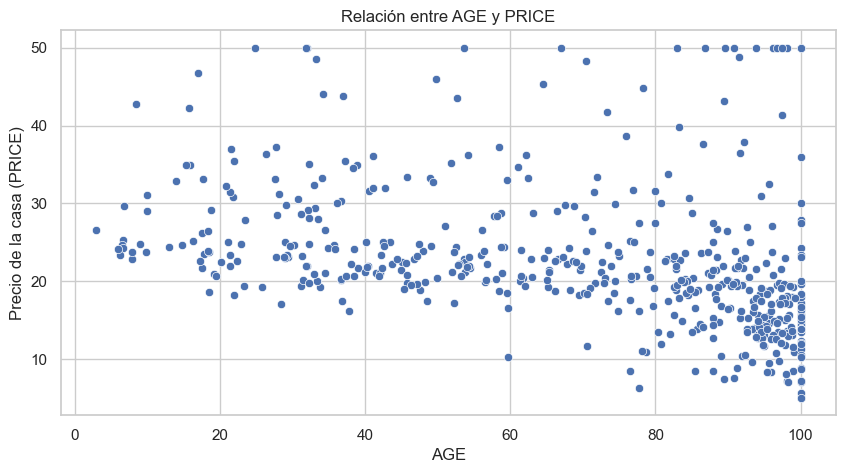

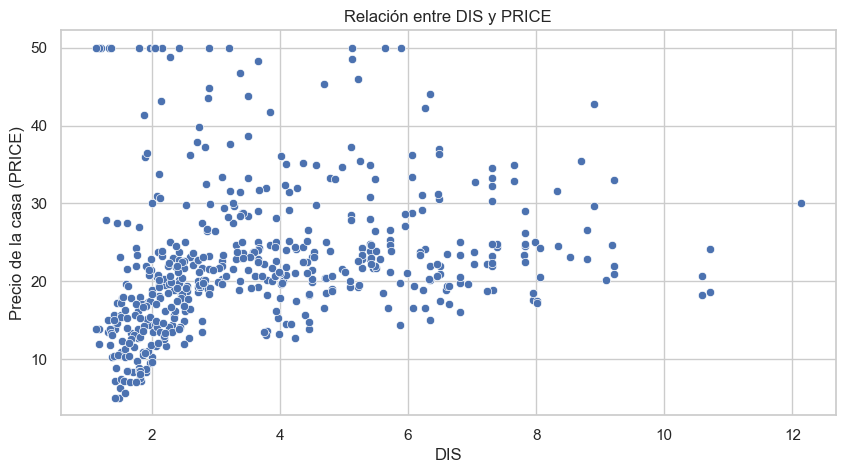

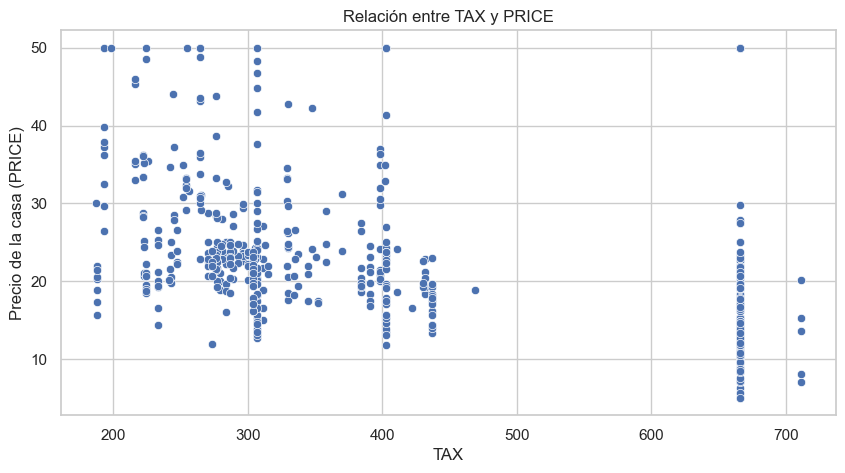

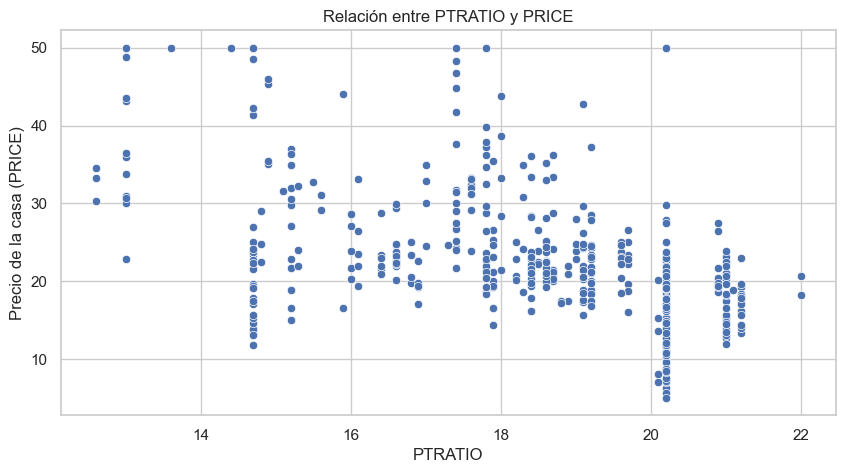

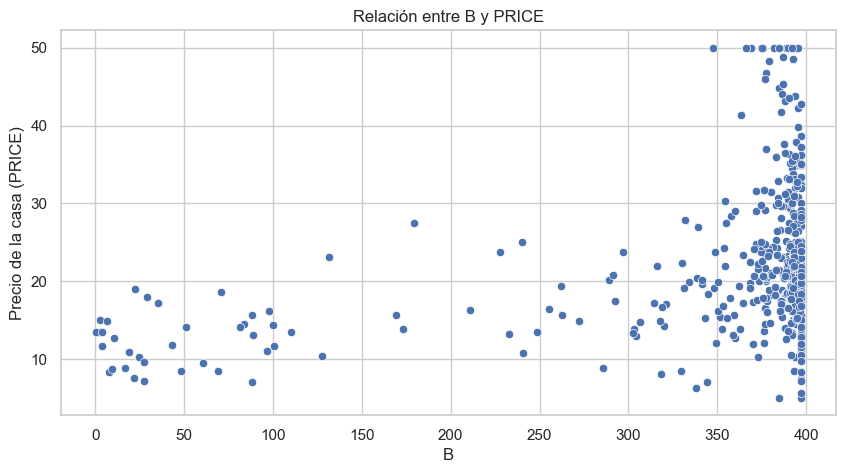

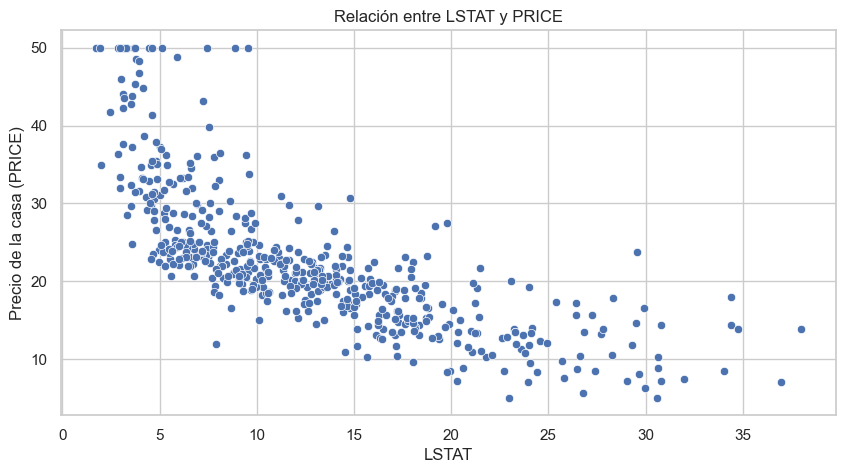

In [13]:
# Realiza gráficos de dispersión para analizar la relación entre variables
continuous_vars = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]

# Crear gráficos de dispersión para cada variable continua contra PRICE
for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=var, y='PRICE', data=df)
    plt.title(f'Relación entre {var} y PRICE')
    plt.xlabel(var)
    plt.ylabel('Precio de la casa (PRICE)')
    plt.show()

Comentarios sobre los gráficos de dispersión entre las variables y PRICE: la relación lineal posiblemente exista entre PRICE y todas las variables. Aún así, las más claras visualmente son entre PRICE y ZN, RM, AGE y LSTAT.

Parte 2: Preparación de los datos para estimación de un modelo de regresión.

In [14]:
## Convierta variables categóricas en variables dummy
# La variable CHAS es categórica
df = pd.get_dummies(df, columns=["CHAS"], drop_first=True)

In [15]:
# Asegúrese de que todas las variables que se introducirán en el modelo sean de formato numérico (int o float)
if 'CHAS_1.0' in df.columns:
    df['CHAS_1.0'] = df['CHAS_1.0'].astype(float) 

df.info() 
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   NOX       506 non-null    float64
 4   RM        506 non-null    float64
 5   AGE       506 non-null    float64
 6   DIS       506 non-null    float64
 7   RAD       506 non-null    float64
 8   TAX       506 non-null    float64
 9   PTRATIO   506 non-null    float64
 10  B         506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  PRICE     506 non-null    float64
 13  CHAS_1.0  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
## Separe el conjunto de datos en X (características) e y (target)
X = df.drop("PRICE", axis=1)  # Todas las variables excepto PRICE son características
y = df["PRICE"]  

In [18]:
## Divida el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split de Scikit-Learn, con una proporción de 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Parte 3: Estimación de un modelo Lasso para la selección de variables

In [19]:
## Entrene un modelo Lasso utilizando la clase Lasso de Scikit-Learn con un parámetro de penalización alpha=0.5
from sklearn.linear_model import Lasso
modelo_lasso = Lasso(alpha=0.05,random_state=42)
modelo_lasso.fit(X_train, y_train)

Lasso(alpha=0.05, random_state=42)

In [23]:
## Evalúe el modelo utilizando las siguientes métricas: MAPE, MPE, R², y el porcentaje de observaciones dentro del ±20% del MPE. ¿Tiene el modelo un buen rendimiento?
modelo_lasso = Lasso(alpha=0.05, random_state=42)
modelo_lasso.fit(X_train, y_train)

# Predicciones del modelo
test_pred = modelo_lasso.predict(X_test)
train_pred = modelo_lasso.predict(X_train)

# Evaluación
print('TEST DE EVALUACION:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

TEST DE EVALUACION:
_____________________________________
MAPE: 16.6807656004832
MPE: 0.8329183793527992
R2 Square: 0.657025080408246
% Observaciones en ±20% de MAPE: 77.45098039215686
Train set evaluation:
_____________________________________
MAPE: 16.775079835444153
MPE: -3.5296619289800484
R2 Square: 0.7404569455700637
% Observaciones en ±20% de MAPE: 72.52475247524752


Comentarios acerca de las métricas: Los valores del MAPE entre ambos grupos son cercanos a +- 16.6, y el porcentaje de observaciones en ±20% de MAPE es parecido también en ambas. La diferencia en el MPE se debe a que no está en valores absolutos.
En base a esto, el modelo tiene un buen rendimiento.

In [24]:
# Visualizar los coeficientes del modelo Lasso en un DataFrame
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_lasso.coef_
})
coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)
print(coefficients)

# Identificar las variables con coeficientes cercanos a cero
relevant_features = coefficients[coefficients['Coeficiente'] != 0]
irrelevant_features = coefficients[coefficients['Coeficiente'] == 0]

    Variable  Coeficiente
4         RM     4.443668
12  CHAS_1.0     1.704030
7        RAD     0.234445
1         ZN     0.034602
10         B     0.013035
8        TAX    -0.012599
5        AGE    -0.017337
2      INDUS    -0.023023
0       CRIM    -0.104256
3        NOX    -0.524583
11     LSTAT    -0.549277
9    PTRATIO    -0.729013
6        DIS    -1.183960


Comentario: algunas variables tienen coeficientes muy pequeños. Eliminaría TAX, AGE, B, ZN. Evaluaría cuales considerar o a partir de qué umbral considerar o no.

Parte 4: Estimación de un modelo RandomForest

Las variables tomadas a partir de Lasso para el modelo Random Forest serán: RM, CHAS, RAD, DIS, LSTAT.

In [25]:
## Estime un modelo Random Forest y realice la búsqueda de los mejores hiperparámetros para el número de árboles (n_estimators) utilizando GridSearchCV.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

# Definir las variables seleccionadas por Lasso
selected_features = ['RM', 'CHAS_1.0', 'RAD', 'DIS', 'LSTAT']

# Preparar los conjuntos de datos con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Definir el modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}
# Realizar la búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train_selected, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 5, 'n_estimators': 100}


In [26]:
## Evalúe el modelo utilizando las siguientes métricas: MAPE, MPE, R², y el porcentaje de observaciones dentro del ±20% del MPE. ¿Tiene el modelo un buen rendimiento? 
def print_evaluate(true, predicted): 
    true = true.ravel() if true.ndim > 1 else true
    predicted = predicted.ravel() if predicted.ndim > 1 else predicted
    
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2

    print(f'MAPE: {mape:.2f}%')
    print(f'MPE: {mpe:.2f}%')
    print(f'R²: {r2_square:.4f}')
# Verificar la forma de los datos
print(X_train_selected.shape)
print(y_train.shape)

# Asegurar la dimensionalidad de y_train
y_train = y_train.ravel()


# Entrenar el modelo Random Forest con los mejores hiperparámetros
best_model_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
best_model_rf.fit(X_train_selected, y_train)

# Evaluar el modelo Random Forest
test_pred_rf = best_model_rf.predict(X_test_selected)
print('Evaluación del modelo Random Forest:\n___________________________________')

print('TEST DE EVALUACION:\n_____________________________________')
print_evaluate(y_test, test_pred_rf)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



(404, 5)
(404,)
Evaluación del modelo Random Forest:
___________________________________
TEST DE EVALUACION:
_____________________________________
MAPE: 14.07%
MPE: -2.95%
R²: 0.8302
Train set evaluation:
_____________________________________
MAPE: 16.78%
MPE: -3.53%
R²: 0.7405


Comentario: El MAPE en el para el grupo de testeo es 14.07%, parecido al MAPE del grupo de train (16.78%). 

In [27]:
# Comparar el rendimiento del modelo Lasso y el modelo Random Forest
print('\nComparación de modelos:\n')
print('Modelo Lasso:')
print_evaluate(y_test, test_pred)
print('\nModelo Random Forest:')
print_evaluate(y_test, test_pred_rf)


Comparación de modelos:

Modelo Lasso:
MAPE: 16.68%
MPE: 0.83%
R²: 0.6570

Modelo Random Forest:
MAPE: 14.07%
MPE: -2.95%
R²: 0.8302


Comentario: el modelo Random Forest tiene un MAPE menor en el grupo de testeo. Esto se debe a que se han utilizado variables seleccionadas a partir de Lasso y se han considerado los mejores hiperparámetros para el número de árboles. En ese sentido, el modelo Random Forest es mejor para el grupo de testeo. 
Para el grupo de training, el modelo de Lasso tiene un MAPE más bajo, y por ende es mejor.

In [34]:
## Evaluar el modelo Random Forest mediante cross_val_score
# Calculo del error absoluto porcentual medio entre las predicciones y los valores reales.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
cv_scores = cross_val_score(best_model_rf, X_train_selected, y_train, cv=5, scoring=mape_scorer)
print('\nResultados de cross_val_score:')
print(cv_scores)


Resultados de cross_val_score:
[-14.06997119 -14.01869856 -15.90186252 -13.13701707 -12.37459677]
